## Importamos las librerías

In [219]:
import pandas as pd
import numpy as np

## 1- Data cleaning

In [220]:
df = pd.read_csv('Datos/metadata.csv')
display(df.head())

print(df.info())

,patient_id,lesion_id,smoke,drink,background_father,background_mother,age,pesticide,gender,skin_cancer_history,...,diameter_2,itch,grew,hurt,changed,bleed,elevation,img_id,biopsed,diagnostic
0,PAT_715,4072,False,True,POMERANIA,POMERANIA,80,True,MALE,False,...,2.0,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,PAT_715_4072_827.png,False,ACK
1,PAT_217,963,False,True,POMERANIA,POMERANIA,76,False,MALE,False,...,5.0,TRUE,FALSE,FALSE,FALSE,TRUE,FALSE,PAT_217_963_806.png,False,ACK
2,PAT_86,1082,False,False,POMERANIA,POMERANIA,53,False,FEMALE,True,...,15.0,TRUE,TRUE,TRUE,FALSE,TRUE,TRUE,PAT_86_1082_41.png,True,ACK
3,PAT_880,1675,False,False,GERMANY,GERMANY,83,False,FEMALE,True,...,40.0,TRUE,FALSE,TRUE,FALSE,FALSE,FALSE,PAT_880_1675_704.png,True,ACK
4,PAT_86,1082,False,False,POMERANIA,POMERANIA,53,False,FEMALE,True,...,15.0,TRUE,TRUE,TRUE,FALSE,TRUE,TRUE,PAT_86_1082_220.png,True,ACK


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 802 entries, 0 to 801
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   patient_id           802 non-null    object 
 1   lesion_id            802 non-null    int64  
 2   smoke                624 non-null    object 
 3   drink                624 non-null    object 
 4   background_father    615 non-null    object 
 5   background_mother    614 non-null    object 
 6   age                  802 non-null    int64  
 7   pesticide            624 non-null    object 
 8   gender               624 non-null    object 
 9   skin_cancer_history  624 non-null    object 
 10  cancer_history       624 non-null    object 
 11  has_piped_water      624 non-null    object 
 12  has_sewage_system    624 non-null    object 
 13  fitspatrick          624 non-null    float64
 14  region               802 non-null    object 
 15  diameter_1           624 non-null    flo

### Eliminamos las columnas que no nos interesan (Img-Id)

In [221]:
df = df.drop(columns=['img_id'])

In [222]:
# Contar filas que son exactamente iguales en todo el DataFrame
total_duplicados = df.duplicated().sum()
print(f"Total de filas que son copias exactas: {total_duplicados}")

# Ver cuáles son esas filas para inspeccionarlas
if total_duplicados > 0:
    display(df[df.duplicated(keep=False)].sort_values(by='lesion_id').head(10))

Total de filas que son copias exactas: 94


,patient_id,lesion_id,smoke,drink,background_father,background_mother,age,pesticide,gender,skin_cancer_history,...,diameter_1,diameter_2,itch,grew,hurt,changed,bleed,elevation,biopsed,diagnostic
549,PAT_48,74,False,False,BRAZIL,BRAZIL,73,False,FEMALE,False,...,10.0,7.0,FALSE,TRUE,FALSE,FALSE,FALSE,TRUE,True,SCC
621,PAT_48,74,False,False,BRAZIL,BRAZIL,73,False,FEMALE,False,...,10.0,7.0,FALSE,TRUE,FALSE,FALSE,FALSE,TRUE,True,SCC
581,PAT_56,86,False,False,GERMANY,GERMANY,70,False,FEMALE,False,...,24.0,20.0,TRUE,TRUE,TRUE,FALSE,TRUE,FALSE,True,SCC
521,PAT_56,86,False,False,GERMANY,GERMANY,70,False,FEMALE,False,...,24.0,20.0,TRUE,TRUE,TRUE,FALSE,TRUE,FALSE,True,SCC
332,PAT_70,107,False,True,ITALY,ITALY,67,True,MALE,False,...,9.0,7.0,FALSE,TRUE,FALSE,TRUE,FALSE,FALSE,True,MEL
346,PAT_70,107,False,True,ITALY,ITALY,67,True,MALE,False,...,9.0,7.0,FALSE,TRUE,FALSE,TRUE,FALSE,FALSE,True,MEL
370,PAT_72,110,False,False,POMERANIA,POMERANIA,36,False,FEMALE,True,...,8.0,6.0,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,True,NEV
403,PAT_72,110,False,False,POMERANIA,POMERANIA,36,False,FEMALE,True,...,8.0,6.0,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,True,NEV
657,PAT_87,133,False,False,POMERANIA,POMERANIA,57,False,FEMALE,True,...,17.0,15.0,FALSE,TRUE,FALSE,FALSE,FALSE,TRUE,False,SEK
678,PAT_87,133,False,False,POMERANIA,POMERANIA,57,False,FEMALE,True,...,17.0,15.0,FALSE,TRUE,FALSE,FALSE,FALSE,TRUE,False,SEK


Como hemos visto que hay filas identicas, esto será debido a que se han tomado varias fotos para el mismo paciente y lesión. Por tanto, vamos a eliminar estas filas duplicadas.

In [223]:
# Eliminamos las filas que son 100% idénticas
df = df.drop_duplicates(keep='first')

# Verificamos cuántas filas nos quedan
print(f"Registros después de eliminar duplicados exactos: {len(df)}")

Registros después de eliminar duplicados exactos: 708


Ahora borramos las columnas patient_id y lesion_id

In [224]:
df = df.drop(columns=['patient_id','lesion_id'])

### Preprocessing de NaNs

Vemos que columnas tienen NaN

In [225]:
NaN = pd.DataFrame({"Count":df.isnull().sum(),"Porcentaje":round(df.isnull().sum()/len(df)*100,2)})
NaN = NaN.sort_values(by="Count", ascending=False)
NaN = NaN[NaN["Count"]>0]
display(NaN)

,Count,Porcentaje
background_mother,169,23.87
background_father,168,23.73
smoke,163,23.02
drink,163,23.02
pesticide,163,23.02
gender,163,23.02
skin_cancer_history,163,23.02
fitspatrick,163,23.02
cancer_history,163,23.02
has_piped_water,163,23.02


Vamos a ver cuales son las filas que tienen NaN para saber si son de la misma persona o no

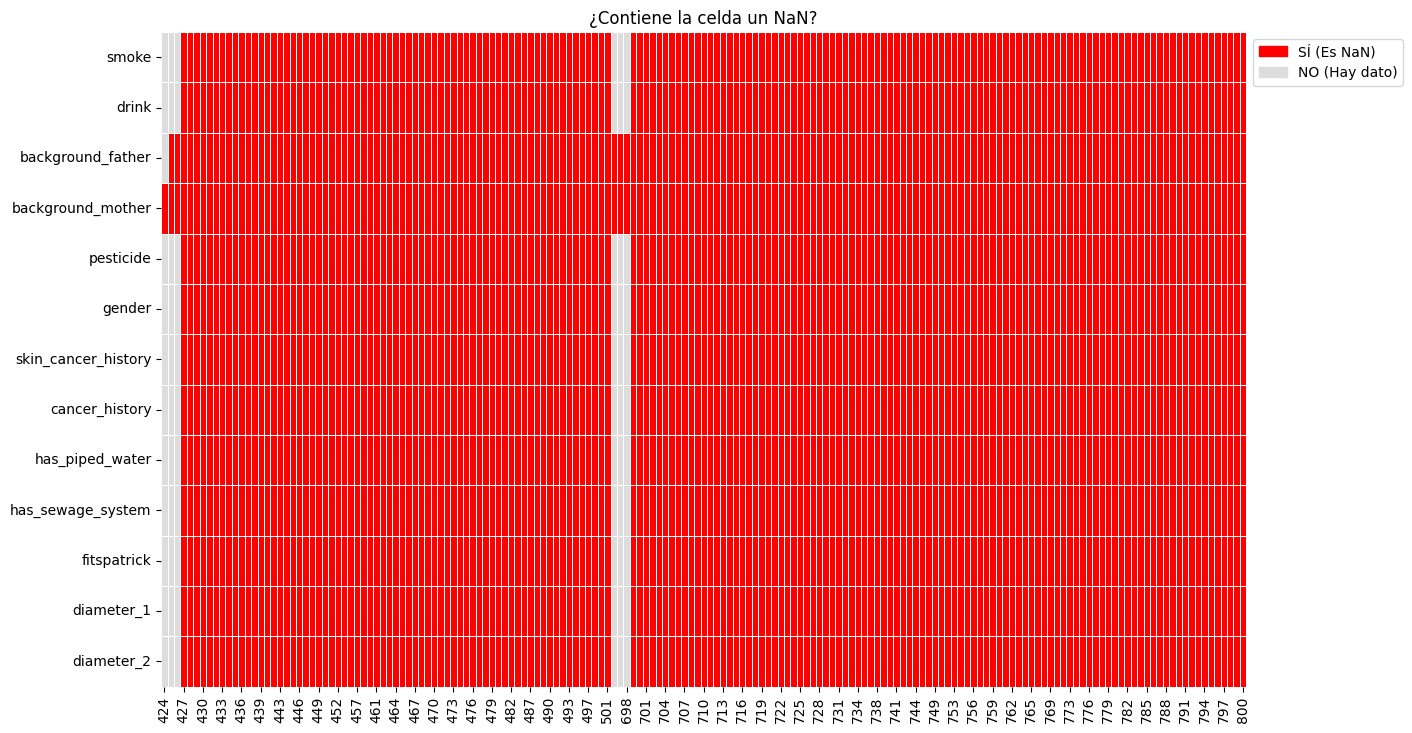

In [226]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# 1. Preparación de datos (solo columnas y filas con nulos)
cols_con_nans = df.columns[df.isnull().any()].tolist()
df_nans_t = df[cols_con_nans][df.isnull().any(axis=1)].isnull().T

# 2. Definimos colores exactos: Gris para datos, Rojo para nulos
cmap_binario = mcolors.ListedColormap(['#DDDDDD', '#FF0000']) 

plt.figure(figsize=(14, len(cols_con_nans) * 0.5 + 2))

# Graficamos
sns.heatmap(
    df_nans_t, 
    cbar=False, 
    cmap=cmap_binario,
    linewidths=0.5, 
    linecolor='white',
    yticklabels=True,
)

# 3. Leyenda manual simple
import matplotlib.patches as mpatches
red_patch = mpatches.Patch(color='#FF0000', label='SÍ (Es NaN)')
grey_patch = mpatches.Patch(color='#DDDDDD', label='NO (Hay dato)')
plt.legend(handles=[red_patch, grey_patch], loc='upper left', bbox_to_anchor=(1, 1))

plt.title("¿Contiene la celda un NaN?")
plt.show()

Para las columnas booleanas vamos a cambiar los NaN, por una variable llamada (Unknown)

In [227]:
cols_para_fix = ['smoke', 'drink','pesticide','gender','skin_cancer_history','cancer_history','has_piped_water','has_sewage_system']
df[cols_para_fix] = df[cols_para_fix].fillna('Unknown')

Vamos a ver como se distribuyen las columnas con valor discreto (background_father, background_mother y fitspatrick)

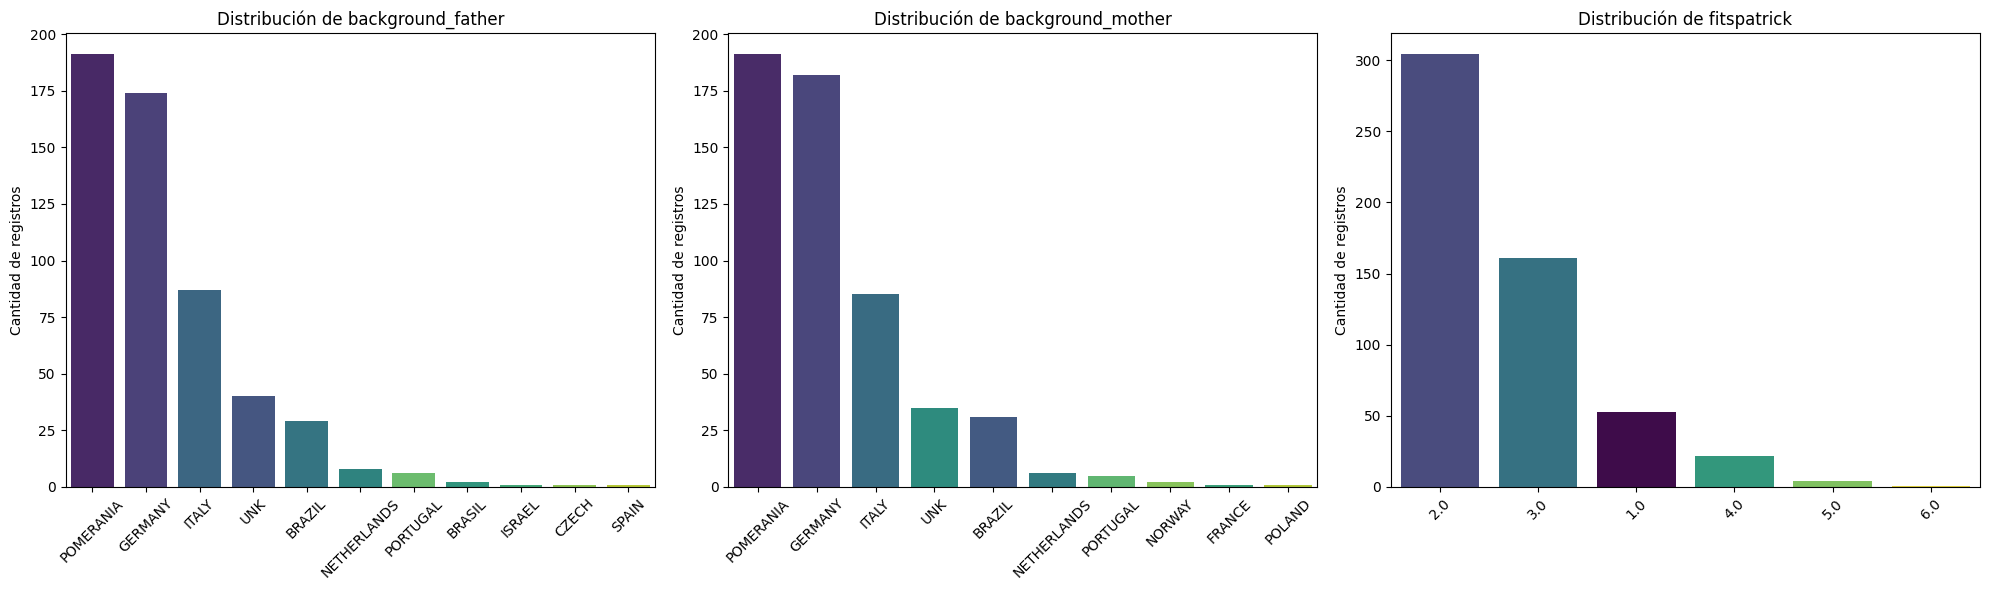

In [228]:
cols_discretas = ['background_father', 'background_mother', 'fitspatrick']

fig, axes = plt.subplots(1, 3, figsize=(20, 6))

for i, col in enumerate(cols_discretas):
    # Ordenamos los datos para el eje X
    order = df[col].value_counts().index
    
    # Solución al Future濃厚Warning: asignamos x a hue y legend=False
    sns.countplot(
        data=df, 
        x=col, 
        ax=axes[i], 
        hue=col, 
        palette='viridis', 
        order=order, 
        legend=False
    )
    
    axes[i].set_title(f'Distribución de {col}')
    
    # Solución al UserWarning: Usar tick_params en lugar de set_xticklabels 
    # o simplemente rotar sin re-etiquetar
    axes[i].tick_params(axis='x', rotation=45)
    
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Cantidad de registros')

plt.tight_layout()
plt.show()

Vamos a rellenar los NaN en función de los porcentajes que se observan en los histogramas, esto quiere decir que por ejemplo, si en a columna fitspatrick hay un 55% de que el NaN se sustituya por "2.0" se utilizará ese porcentaje.

In [229]:
# Para que los resultados sean siempre los mismos al ejecutar
np.random.seed(42) 

for col in cols_discretas:
    # 1. Calculamos la distribución ignorando los NaNs
    # value_counts() por defecto no cuenta los nulos
    counts = df[col].value_counts(normalize=True)
    categorias = counts.index
    probabilidades = counts.values
    
    # 2. Identificamos qué filas tienen el valor nulo (NaN)
    mask_nulos = df[col].isnull()
    cantidad_a_rellenar = mask_nulos.sum()
    
    # 3. Si hay nulos, rellenamos con el "sorteo" basado en los porcentajes
    if cantidad_a_rellenar > 0:
        valores_imputados = np.random.choice(
            categorias, 
            size=cantidad_a_rellenar, 
            p=probabilidades
        )
        
        # 4. Sustituimos los NaN por los valores sorteados
        df.loc[mask_nulos, col] = valores_imputados

Ahora solo quedan dos columnas con NaNs, diameter_1 y diameter_2. Estas tienen valores continuas, así que vamos a observar sus distribuciones

In [ ]:
# Configuramos el lienzo para 4 gráficos (2 por columna)
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# --- Análisis de diameter_1 ---
sns.histplot(df['diameter_1'].dropna(), kde=True, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Distribución de diameter_1 (Histograma + KDE)')

sns.boxplot(x=df['diameter_1'], ax=axes[1, 0], color='skyblue')
axes[1, 0].set_title('Boxplot de diameter_1 (Detección de outliers)')

# --- Análisis de diameter_2 ---
sns.histplot(df['diameter_2'].dropna(), kde=True, ax=axes[0, 1], color='salmon')
axes[0, 1].set_title('Distribución de diameter_2 (Histograma + KDE)')

sns.boxplot(x=df['diameter_2'], ax=axes[1, 1], color='salmon')
axes[1, 1].set_title('Boxplot de diameter_2 (Detección de outliers)')

plt.tight_layout()
plt.show()

# Estadisticas
display(df[['diameter_1', 'diameter_2']].describe())

Para completar los NaNs, vamos a utilizar imputación KNN, la cual permite rellenar los huecos basándose en el perfil de pacientes con características similares en lugar de usar una media o mediana. Esto último se descarta debido a que estos métodos asignan un valor idéntico a todos los registros, ignorando las particularidades de cada caso y reduciendo artificialmente la variabilidad de los datos. Esto tiene sentido, ya que el tamaño de una lesión no es un evento aleatorio, sino que suele estar condicionado por otros factores, como los que tenemos como columnas. Al emplear este método, se logra preservar la distribución original de la muestra, manteniendo la proporción real entre lesiones pequeñas y grandes sin distorsionar los datos. Asimismo, este procedimiento permite gestionar adecuadamente los outliers, asegurando que estos registros médicos tan relevantes no se pierdan, pero evitando a la vez que su valor extremo afecte artificialmente al resto de las estimaciones, garantizando así un dataset final mucho más preciso y cercano a la realidad clínica.

In [ ]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OrdinalEncoder

# 1. Copiamos el dataframe
df_knn = df.copy()

# 2. Identificamos columnas categóricas (incluyendo posibles booleanos)
# Usamos 'object' y 'bool' para capturar todo lo que no sea numérico
categorical_cols = df_knn.select_dtypes(include=['object', 'bool']).columns

# Convertimos todas esas columnas a string para que el Encoder no falle
for col in categorical_cols:
    df_knn[col] = df_knn[col].astype(str)
# -------------------------

# Ahora el encoder funcionará sin problemas
encoder = OrdinalEncoder()
df_knn[categorical_cols] = encoder.fit_transform(df_knn[categorical_cols])

# 3. Aplicamos el KNNImputer
imputer = KNNImputer(n_neighbors=5)
df_imputed = pd.DataFrame(imputer.fit_transform(df_knn), columns=df_knn.columns)

# 4. Devolvemos los diámetros imputados al DataFrame original
df['diameter_1'] = df_imputed['diameter_1']
df['diameter_2'] = df_imputed['diameter_2']

### Convertir a valor numérico las columnas

Para transformar los datos de texto a números, se ha utilizado One-Hot Encoding en lugar de asignar números seguidos (1, 2, 3...) porque la mayoría de las categorías no tienen un orden lógico. Si asignáramos números correlativos a variables como el sexo o el país de origen, el modelo podría pensar erróneamente que una opción es "más importante" o "vale más" que otra solo por tener un número más alto. Al crear columnas independientes de ceros y unos, nos aseguramos de que el modelo trate cada característica de forma justa y separada, evitando errores de interpretación y respetando la realidad de los datos médicos.

In [ ]:
# 1. Identificamos las columnas categóricas
cols_categoricas = df.select_dtypes(include=['object', 'bool']).columns.tolist()

# Quitamos 'diagnostic' de la lista de transformación 
if 'diagnostic' in cols_categoricas:
    cols_categoricas.remove('diagnostic')

# Aplicamos One-Hot Encoding solo a las demás columnas
X = pd.get_dummies(
    df, 
    columns=cols_categoricas, 
    prefix_sep='_', 
    dtype=int
)

# Visualizamos (ahora verás que 'diagnostic' sigue siendo una sola columna)
display(X.head())

#Lo descargamos en un csv
X.to_csv('Datos/CleanData.csv', index=False, sep=',')

,age,fitspatrick,diameter_1,diameter_2,diagnostic,smoke_False,smoke_True,smoke_Unknown,drink_False,drink_True,...,changed_TRUE,changed_UNK,bleed_FALSE,bleed_TRUE,bleed_UNK,elevation_FALSE,elevation_TRUE,elevation_UNK,biopsed_False,biopsed_True
0,80,2.0,3.0,2.0,ACK,1,0,0,0,1,...,0,0,1,0,0,0,1,0,1,0
1,76,1.0,6.0,5.0,ACK,1,0,0,0,1,...,0,0,0,1,0,1,0,0,1,0
2,53,2.0,20.0,15.0,ACK,1,0,0,1,0,...,0,0,0,1,0,0,1,0,0,1
3,83,2.0,35.0,40.0,ACK,1,0,0,1,0,...,0,0,1,0,0,1,0,0,0,1
5,57,3.0,10.0,7.0,ACK,1,0,0,1,0,...,0,0,1,0,0,0,1,0,1,0
